This is a notebook that will analyze weather data downloaded from accuweather for Pune city for year of 2017, 2018.
It is only the temperature data and we will work with that data.

In [476]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [477]:
# Allows the display all dataframe rows and the width of each column in the notebook
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

In [478]:
sample = pd.read_csv('output_1.csv')
sample.head()

,day,max,min,year
0,"Sun 1/1,Sun 1/8,Sun 1/15,Sun 1/22,Sun 1/29","30,30,29,31,31","11,10,14,13,12",2017
1,"Mon 1/2,Mon 1/9,Mon 1/16,Mon 1/23,Mon 1/30","31,29,29,32,32","11,11,15,13,12",2017
2,"Tue 1/3,Tue 1/10,Tue 1/17,Tue 1/24,Tue 1/31","28,30,30,30,33","9,9,15,13,12",2017
3,"Wed 1/4,Wed 1/11,Wed 1/18,Wed 1/25,Wed 2/1","29,29,29,31,32","9,8,14,13,13",2017
4,"Thu 1/5,Thu 1/12,Thu 1/19,Thu 1/26,Thu 2/2","30,27,28,32,33","8,7,12,13,14",2017


In [479]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
day     84 non-null object
max     84 non-null object
min     84 non-null object
year    84 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [480]:
sample['day'][0].split(","), sample['max'][0], sample['min'][0], sample['year'][0]

(['Sun 1/1', 'Sun 1/8', 'Sun 1/15', 'Sun 1/22', 'Sun 1/29'],
 '30,30,29,31,31',
 '11,10,14,13,12',
 '2017')

This dataset needs to be reformatted to be used, to have a DF in the following format ::
    weekday | month | day | max  | min
    'Sun'      '1'    '01'  '30'   '2'

In [481]:
final_data =  pd.DataFrame(data=None, columns=['day', 'max', 'min', 'year'])

In [482]:
for key, record in sample.iterrows():
    d = {'day': record['day'].split(","), 
         'max': record['max'].split(","),
         'min': record['min'].split(","),
         'year': record['year']
        }
    df = pd.DataFrame(data=d, columns=['day', 'max', 'min', 'year'])
    final_data = pd.concat([final_data, df], ignore_index=True)
    

In [483]:
final_data.tail(10)

,day,max,min,year
431,Fri 12/15,29,15,December 2017
432,Fri 12/22,29,11,December 2017
433,Fri 12/29,29,9,December 2017
434,Fri 1/5,29,12,December 2017
435,Sat 12/2,28,12,December 2017
436,Sat 12/9,31,18,December 2017
437,Sat 12/16,30,15,December 2017
438,Sat 12/23,30,10,December 2017
439,Sat 12/30,29,9,December 2017
440,Sat 1/6,29,13,December 2017


### Data Cleansing
The day column is made of 3 components - 'Day of week', 'Numerical Month' and 'Day'. So we need to seperate this into
individual columns. Also year is Month in Words and Numerical Year, so they need to go into seperate columns.
Then we need to check for duplicate rows and delete them and then we can do any data analysis.

In [484]:
final_data['split_day'] = final_data['day'].str.split(' ')
final_data.head(5)

,day,max,min,year,split_day
0,Sun 1/1,30,11,2017,"[Sun, 1/1]"
1,Sun 1/8,30,10,2017,"[Sun, 1/8]"
2,Sun 1/15,29,14,2017,"[Sun, 1/15]"
3,Sun 1/22,31,13,2017,"[Sun, 1/22]"
4,Sun 1/29,31,12,2017,"[Sun, 1/29]"


In [485]:
final_data['day_of_week'] = final_data['split_day'].str.get(0)
final_data['day_of_month'] = final_data['split_day'].str.get(1)
final_data.head(5)

,day,max,min,year,split_day,day_of_week,day_of_month
0,Sun 1/1,30,11,2017,"[Sun, 1/1]",Sun,1/1
1,Sun 1/8,30,10,2017,"[Sun, 1/8]",Sun,1/8
2,Sun 1/15,29,14,2017,"[Sun, 1/15]",Sun,1/15
3,Sun 1/22,31,13,2017,"[Sun, 1/22]",Sun,1/22
4,Sun 1/29,31,12,2017,"[Sun, 1/29]",Sun,1/29


In [486]:
final_data['month_n_day'] = final_data['day_of_month'].str.split('/')
final_data['month'] = final_data['month_n_day'].str.get(0)
final_data['day'] = final_data['month_n_day'].str.get(1)
final_data.head(5)

,day,max,min,year,split_day,day_of_week,day_of_month,month_n_day,month
0,1,30,11,2017,"[Sun, 1/1]",Sun,1/1,"[1, 1]",1
1,8,30,10,2017,"[Sun, 1/8]",Sun,1/8,"[1, 8]",1
2,15,29,14,2017,"[Sun, 1/15]",Sun,1/15,"[1, 15]",1
3,22,31,13,2017,"[Sun, 1/22]",Sun,1/22,"[1, 22]",1
4,29,31,12,2017,"[Sun, 1/29]",Sun,1/29,"[1, 29]",1


In [487]:
final_data = final_data.drop(columns = ['split_day', 'month_n_day', 'day_of_month'])

In [488]:
final_data['year'] = 'December 2017'

In [489]:
final_data.head(10)

,day,max,min,year,day_of_week,month
0,1,30,11,December 2017,Sun,1
1,8,30,10,December 2017,Sun,1
2,15,29,14,December 2017,Sun,1
3,22,31,13,December 2017,Sun,1
4,29,31,12,December 2017,Sun,1
5,2,31,11,December 2017,Mon,1
6,9,29,11,December 2017,Mon,1
7,16,29,15,December 2017,Mon,1
8,23,32,13,December 2017,Mon,1
9,30,32,12,December 2017,Mon,1


### Check for duplicates

In [490]:
sum(final_data.duplicated())

70

In [491]:
to_delete = final_data[final_data.duplicated(keep=False)]
to_delete.sort_values(by=['day', 'max', 'min']).head(20) 

,day,max,min,year,day_of_week,month
234,1,28,21,December 2017,Tue,8
269,1,28,21,December 2017,Tue,8
393,1,29,13,December 2017,Fri,12
429,1,29,13,December 2017,Fri,12
288,1,29,21,December 2017,Fri,9
319,1,29,21,December 2017,Fri,9
216,1,29,23,December 2017,Sat,7
253,1,29,23,December 2017,Sat,7
348,1,31,14,December 2017,Wed,11
379,1,31,14,December 2017,Wed,11


In [492]:
final_data.drop_duplicates(inplace=True)

In [493]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 440
Data columns (total 6 columns):
day            371 non-null object
max            371 non-null object
min            371 non-null object
year           371 non-null object
day_of_week    371 non-null object
month          371 non-null object
dtypes: object(6)
memory usage: 20.3+ KB


#### merge the max and min columns to a single column called temp_type and values

In [494]:
final_data = pd.melt(final_data, id_vars=["year", "month", "day", "day_of_week"], value_vars= ['max', 'min'], 
                                                             var_name="temp_type", value_name="values")
final_data.tail()

,year,month,day,day_of_week,temp_type,values
737,December 2017,12,9,Sat,min,18
738,December 2017,12,16,Sat,min,15
739,December 2017,12,23,Sat,min,10
740,December 2017,12,30,Sat,min,9
741,December 2017,1,6,Sat,min,13


In [495]:
final_data['day'] = final_data.day.astype(np.int64)
final_data['values'] = final_data['values'].astype(np.int64)

In [496]:
final_data['month'] = final_data['month'].astype(np.int64)

In [497]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 6 columns):
year           742 non-null object
month          742 non-null int64
day            742 non-null int64
day_of_week    742 non-null object
temp_type      742 non-null object
values         742 non-null int64
dtypes: int64(3), object(3)
memory usage: 34.9+ KB


In [498]:
sum(final_data.duplicated())

0

### Visualize the data now!!!

In [499]:
yearly = final_data.groupby(['month', 'temp_type']).values.mean()
yearly.head()

month  temp_type
1      max          29.702703
       min          11.324324
2      max          33.392857
       min          13.642857
3      max          35.774194
Name: values, dtype: float64

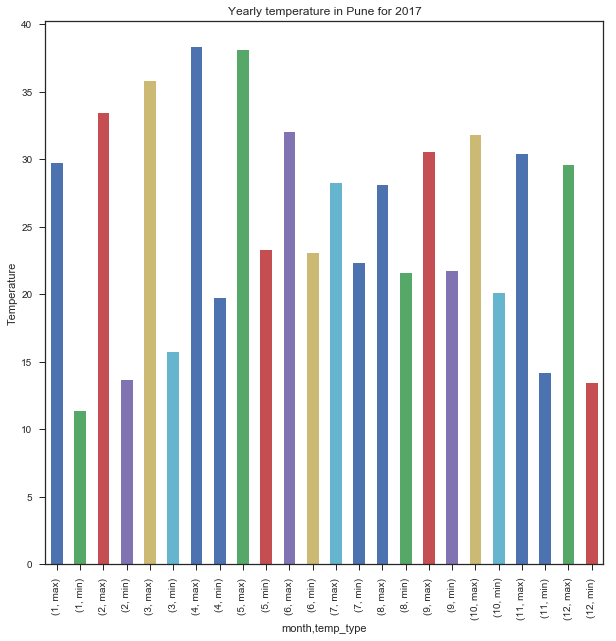

In [500]:
plt.title('Yearly temperature in Pune for 2017')
plt.ylabel('Temperature')
yearly.plot(x='month', y='values', kind='bar', figsize=(10,10));

In [501]:
daily_May = final_data[final_data['month'] == 5].groupby(['day', 'temp_type']).values.mean()
daily_May.head()

day  temp_type
1    max          39
     min          19
2    max          40
     min          20
3    max          36
Name: values, dtype: int64

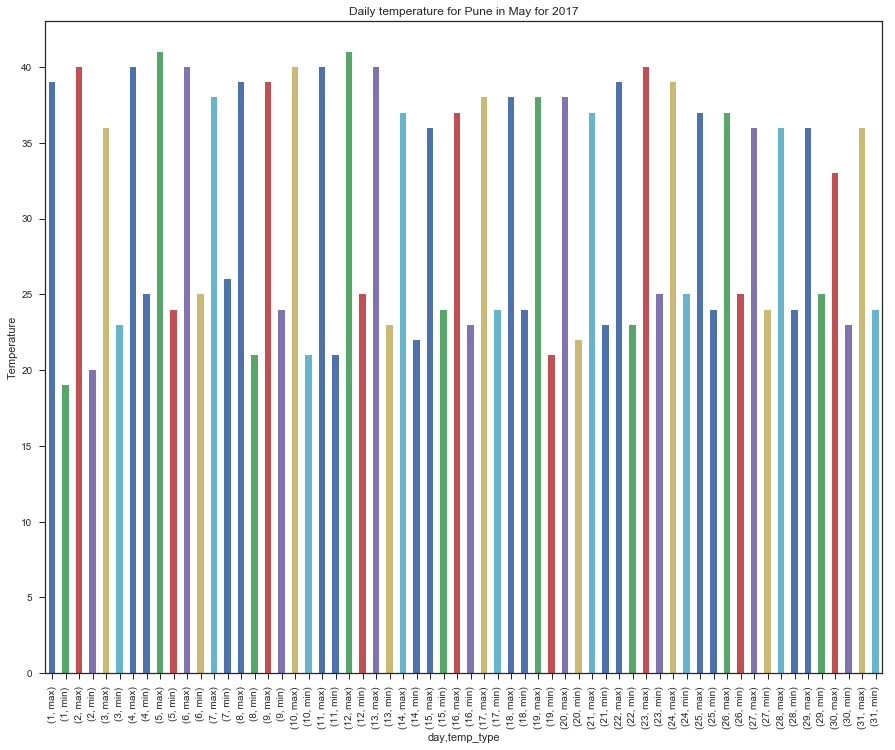

In [502]:
plt.title('Daily temperature for Pune in May for 2017')
plt.ylabel('Temperature')
daily_May.plot(x='day', y='values', kind='bar', figsize=(15,12));

In [503]:
daily_Jan = final_data[final_data['month'] == 1].groupby(['day', 'temp_type']).values.mean()
daily_Jan.head()

day  temp_type
1    max          29.5
     min          11.0
2    max          30.0
     min          11.0
3    max          28.5
Name: values, dtype: float64

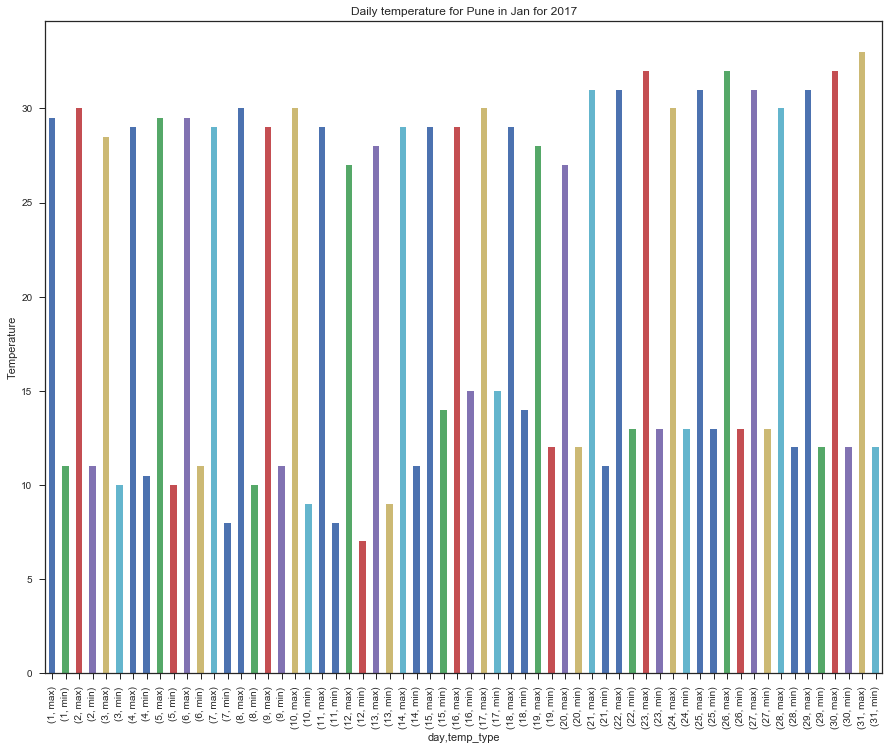

In [504]:
plt.title('Daily temperature for Pune in Jan for 2017')
plt.ylabel('Temperature')
daily_Jan.plot(x='day', y='values', kind='bar', figsize=(15,12));

In [505]:
daily_July = final_data[final_data['month'] == 7].groupby(['day', 'temp_type']).values.mean()
daily_July.head()

day  temp_type
1    max          29
     min          23
2    max          29
     min          23
3    max          30
Name: values, dtype: int64

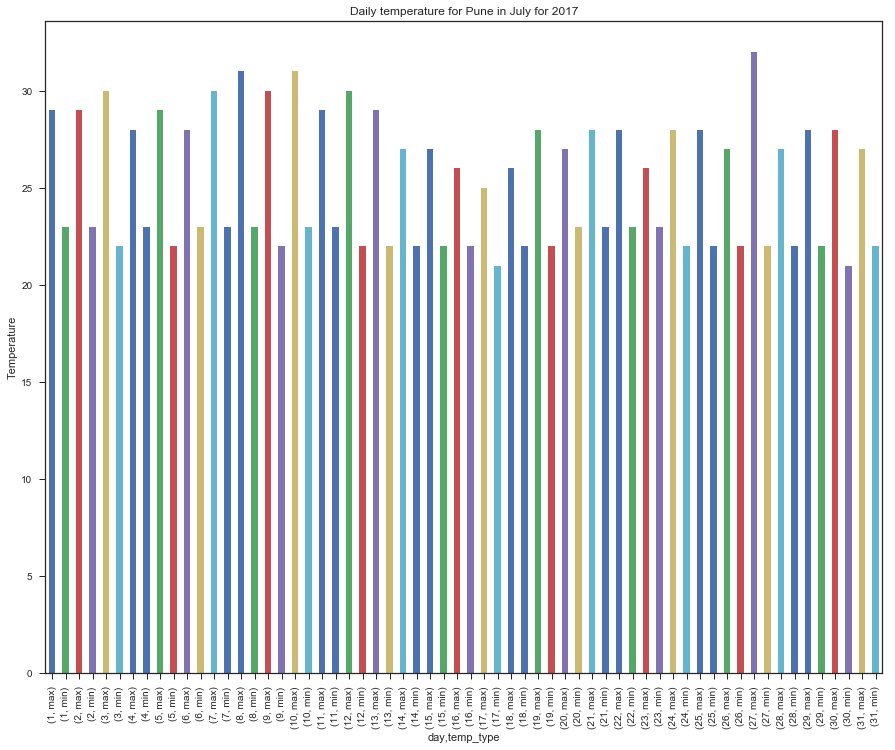

In [506]:
plt.title('Daily temperature for Pune in July for 2017')
plt.ylabel('Temperature')
daily_July.plot(x='day', y='values', kind='bar', figsize=(15,12));

### Insights of the data:

There is not much insights, but then as global warming, and temperature rise is of utmost importance to us all over the world and in Pune, wanted to check the temperature.
Will analyse the same over different years as well:
But here for 2017, the datasource is from a leading weather forcasting site, I dont want to name the site here.
Pune, part of India is a tropical city, with 3 weathers - summers, winter and monsoon.

Typical summer months are from mid-March to mid-June.The monsoon lasts from June to October.For most of December and January is the coldest. So have plotted the temperatures for Jan/May/July 2017. All temperatures in deg cent.
Jan - Max - (31 deg) Min - (6 deg) - Winter
July - Max - (32 deg) Min - (20 deg) - Monsoon, so the temperatures tend to be low, but the night temperature dont go as low as winter. 
May - Max - (41 deg) Min - (19 deg) - Summer, it is hot, the days are long so it is hot, though the night was 19 deg Pune. The nights are usually cool in Pune due to its high altitude and away from the sea, so the humidity is also low other than in the monsoon season, when the humidity tends to increase. 

If you look at the yearly Max/Min temperature - April 2017 had a average max temperature in the month and Jan 2017 had the average lowest temperature in the month of the year (2017).
